In [1]:
# Required: Import packages
import json
import pandas as pd
from PIL import Image
import numpy as np

# 0. Load and Clean Data

In [2]:
# Required: Load labels json file containing image object labels

with open('/Users/karina/Downloads/bdd100k 3/labels/bdd100k_labels_images_train.json') as json_file:
    train_data = json.load(json_file)

with open('/Users/karina/Downloads/bdd100k 3/labels/bdd100k_labels_images_val.json') as json_file:
    test_data = json.load(json_file)

In [3]:
# Required: Normalize semi-structured JSON data into a pd dataframe
data_normalized = pd.json_normalize(train_data)
test_data_normalized = pd.json_normalize(test_data)
type(data_normalized)

pandas.core.frame.DataFrame

In [4]:
# Optional - Testing only -- check number of images 
data_normalized.shape

(69863, 6)

# 1. Determine number of objects in the image
<see TIffany's notebook>

In [5]:
# REQUIRED: Function used to clean data, extract labels, and extract data for sunny, 
# highway, and daytime conditions

def clean_data(data_normalized):
    # Initialize lists of object types. Each list will contain 69863 values, each of which corresponds to an image specified as a row in data_cleaned 
    num_objects = []
    num_road = []
    num_sidewalk = []
    num_building = []
    num_wall = []
    num_fence = []
    num_pole = []
    num_traffic_light = []
    num_traffic_sign = []
    num_vegetation = []
    num_terrain = []
    num_sky = []
    num_person = []
    num_rider = []
    num_car = []
    num_truck = []
    num_bus = []
    num_train = []
    num_motorcycle = []
    num_bicycle = []
    num_lanes = []
    num_drivable_area = []

    # Iterate through each image in data_normalized, sum up the number of objects corresponding to each object type, and append to
    # the corresponding object list
    for index, row in data_normalized.iterrows():
        num_objects.append(len(row['labels']))
        num_road.append(sum(x['category'] == 'road' for x in row['labels']))
        num_sidewalk.append(sum(x['category'] == 'sidewalk' for x in row['labels']))
        num_building.append(sum(x['category'] == 'building' for x in row['labels']))
        num_wall.append(sum(x['category'] == 'wall' for x in row['labels']))
        num_fence.append(sum(x['category'] == 'fence' for x in row['labels']))
        num_pole.append(sum(x['category'] == 'pole' for x in row['labels']))
        num_traffic_light.append(sum(x['category'] == 'traffic light' for x in row['labels']))
        num_traffic_sign.append(sum(x['category'] == 'traffic sign' for x in row['labels']))
        num_vegetation.append(sum(x['category'] == 'vegetation' for x in row['labels']))
        num_terrain.append(sum(x['category'] == 'terrain' for x in row['labels']))
        num_sky.append(sum(x['category'] == 'sky' for x in row['labels']))
        num_person.append(sum(x['category'] == 'person' for x in row['labels']))
        num_rider.append(sum(x['category'] == 'rider' for x in row['labels']))
        num_car.append(sum(x['category'] == 'car' for x in row['labels']))
        num_truck.append(sum(x['category'] == 'truck' for x in row['labels']))
        num_bus.append(sum(x['category'] == 'bus' for x in row['labels']))
        num_train.append(sum(x['category'] == 'train' for x in row['labels']))
        num_motorcycle.append(sum(x['category'] == 'motorcycle' for x in row['labels']))
        num_bicycle.append(sum(x['category'] == 'bicycle' for x in row['labels']))
        num_lanes.append(sum(x['category'] == 'lane' for x in row['labels']))
        num_drivable_area.append(sum(x['category'] == 'drivable area' for x in row['labels']))

    data_normalized['num_objects'] = num_objects
    data_normalized['num_sidewalk'] = num_sidewalk
    data_normalized['num_building'] = num_building
    data_normalized['num_wall'] = num_wall
    data_normalized['num_fence'] = num_fence
    data_normalized['num_pole'] = num_pole
    data_normalized['num_traffic_light'] = num_traffic_light
    data_normalized['num_traffic_sign'] = num_traffic_sign
    data_normalized['num_vegetation'] = num_vegetation
    data_normalized['num_terrain'] = num_terrain
    data_normalized['num_sky'] = num_sky
    data_normalized['num_person'] = num_person
    data_normalized['num_rider'] = num_rider
    data_normalized['num_car'] = num_car
    data_normalized['num_truck'] = num_truck
    data_normalized['num_bus'] = num_bus
    data_normalized['num_train'] = num_train
    data_normalized['num_motorcycle'] = num_motorcycle
    data_normalized['num_bicycle'] = num_bicycle
    data_normalized['num_lanes'] = num_lanes
    data_normalized['num_drivable_area'] = num_drivable_area

    # Filter only for images where weather == "clear", scene == "highway", and timeofday == "daytime". 
    # Note: A better implementation may be to filter the dataframe prior to counting the objects per image, 
    # but it may be useful to keep the data_normalized and object counts for each image in case we want to use different filtering values.

    data_cleaned = data_normalized[(data_normalized['attributes.weather'] == "clear") & 
                   (data_normalized['attributes.scene'] == "highway") & 
                   (data_normalized['attributes.timeofday'] == "daytime")]
    return data_cleaned

In [6]:
# Clean Training & Validation Data
training_data_cleaned = clean_data(data_normalized)
# Clean Test Data
test_data_cleaned = clean_data(test_data_normalized)
# Split training dataset to training and validation
training_data_split = training_data_cleaned.sample(frac = 0.9)
val_data_split = training_data_cleaned.drop(training_data_split.index)

# 2. Image ingestion and preprocessing

In [7]:
import cv2

In [8]:
# create function to upload image as np arrays

def image_upload(h, d, ch, image_folder_path, mask_folder_path, image_path):
    
    X = np.empty(shape = (len(image_path), h, d, ch), dtype = 'float32')
    y = np.empty(shape = (len(image_path), h, d, ch), dtype = 'float32')
    
    i = 0
    
    for f in image_path:
        
        #need to account for the ext of mask images being .png
        f_temp = f
        f_temp = f_temp[:-4]
        f_png = (f_temp + '.png')
        
        image = cv2.imread(image_folder_path+f, cv2.IMREAD_COLOR)
        mask = cv2.imread(mask_folder_path+f_png, cv2.IMREAD_COLOR)
 
        X[i] = image
        y[i] = mask
        i+=1
    

#     image_data = cv2.resize(X[j], (128,128))
#     mask_data = cv2.resize(y[j], (128,128)) 
    
#     image_data = image_data[np.newaxis,:,:,:]
#     mask_data = mask_data[np.newaxis,:,:,:]    
        
        
       # tmp = resize(X_train[i], (150,150))
        
    return X, y

In [9]:
# create function to resize image

def image_resize(X, y):
    
    image_data = np.empty(shape = (len(X), 128, 128, 3), dtype = 'float32')
    mask_data = np.empty(shape = (len(y), 128, 128, 3), dtype = 'float32')
    
    for i in range(len(image_data)):
        image = cv2.resize(X[i], (128,128))
        mask = cv2.resize(y[i], (128,128))
    
        image_data[i] = image 
        mask_data[i] = mask 

    return image_data, mask_data

In [10]:
# importing the training data
train_data, train_mask = image_upload(h = 720, d = 1280, ch = 3, 
             image_folder_path = "/Users/karina/Downloads/207_final_project/train/train_data/", 
             mask_folder_path = "/Users/karina/Downloads/207_final_project/train/train_mask/", 
             image_path = training_data_split['name'])
# resize the training data
train_data, train_mask = image_resize(train_data, train_mask)

In [87]:
import pandas as pd
val_data_list = pd.read_csv('val_data_list.csv', names = [0,1,2,3,4,5,6])

In [245]:
val_data_list = val_data_list.reset_index(drop=True)

In [122]:
# importing the val data
val_data, val_mask = image_upload(h = 720, d = 1280, ch = 3, 
             image_folder_path = "/Users/karina/Downloads/207_final_project/val/val_data/", 
             mask_folder_path = "/Users/karina/Downloads/207_final_project/val/val_mask/", 
             image_path = val_data_list)
# resize the val data
val_data, val_mask = image_resize(val_data, val_mask)

ValueError: could not broadcast input array from shape (720,1280,3) into shape (720,1280,1)

In [12]:
# importing the testing data
test_data, test_mask = image_upload(h = 720, d = 1280, ch = 3, 
             image_folder_path = "/Users/karina/Downloads/207_final_project/test/test_data/", 
             mask_folder_path = "/Users/karina/Downloads/207_final_project/test/test_mask/", 
             image_path = test_data_cleaned['name'])
# resize the testing data
test_data, test_mask = image_resize(test_data, test_mask)

In [97]:
import numpy.ma as ma

#removing nan values from train data and train mask (filling with the mean of the columns)
train_mask_clean = train_mask
train_mask_clean = np.where(np.isnan(train_mask_clean), np.nanmean(train_mask_clean, axis=0), train_mask_clean)

train_data_clean = train_data
train_data_clean = np.where(np.isnan(train_data_clean), np.nanmean(train_data_clean, axis=0), train_data_clean)

#removing nan values from train data and train mask (filling with the mean of the columns)
val_mask_clean = val_mask
val_mask_clean = np.where(np.isnan(val_mask_clean), np.nanmean(val_mask_clean, axis=0), val_mask_clean)

val_data_clean = val_data
val_data_clean = np.where(np.isnan(val_data_clean), np.nanmean(val_data_clean, axis=0), val_data_clean)

#printing shape of each to make sure they match and unique values
print(train_data_clean.shape)
print("Unique image data:", np.unique(train_data_clean))

print(train_mask_clean.shape)
print("Unique image data:", np.unique(train_mask_clean))

print(val_data_clean.shape)
print("Unique image data:", np.unique(val_data_clean))

print(val_mask_clean.shape)
print("Unique image data:", np.unique(val_mask_clean))

(3218, 128, 128, 3)
Unique image data: [0.0000000e+00 3.1250000e-02 6.2500000e-02 ... 2.5493750e+02 2.5496875e+02
 2.5500000e+02]
(3218, 128, 128, 3)
Unique image data: [0.        0.03125   0.0625    ... 1.9999784 1.9999893 2.       ]
(357, 128, 128, 3)
Unique image data: [0.0000000e+00 3.1250000e-02 6.2500000e-02 ... 2.5493750e+02 2.5496875e+02
 2.5500000e+02]
(357, 128, 128, 3)
Unique image data: [0.      0.0625  0.125   0.1875  0.3125  0.375   0.4375  0.5625  0.59375
 0.625   0.6875  0.78125 0.8125  0.875   0.9375  1.      1.03125 1.0625
 1.09375 1.125   1.15625 1.1875  1.21875 1.28125 1.3125  1.34375 1.375
 1.40625 1.4375  1.46875 1.5     1.53125 1.5625  1.59375 1.625   1.65625
 1.6875  1.71875 1.78125 1.8125  1.84375 1.875   1.90625 1.9375  1.96875
 2.     ]


In [238]:
val_data_clean

array([[[[ 54.84375,  54.84375,  54.84375],
         [ 53.     ,  53.     ,  53.     ],
         [ 56.5    ,  58.5    ,  58.5    ],
         ...,
         [ 24.46875,  28.46875,  29.46875],
         [ 29.84375,  29.84375,  29.84375],
         [ 41.0625 ,  41.0625 ,  41.0625 ]],

        [[ 53.9375 ,  53.9375 ,  53.9375 ],
         [ 52.0625 ,  52.0625 ,  52.0625 ],
         [ 57.34375,  59.34375,  59.34375],
         ...,
         [ 29.09375,  33.09375,  34.09375],
         [ 25.1875 ,  25.1875 ,  25.1875 ],
         [ 39.34375,  39.34375,  39.34375]],

        [[ 57.78125,  57.78125,  57.78125],
         [ 52.     ,  52.     ,  52.     ],
         [ 53.     ,  55.     ,  55.     ],
         ...,
         [ 33.28125,  37.28125,  38.28125],
         [ 25.     ,  25.     ,  25.     ],
         [ 34.4375 ,  34.4375 ,  34.4375 ]],

        ...,

        [[ 91.5625 ,  91.5625 ,  91.5625 ],
         [ 90.5625 ,  90.5625 ,  90.5625 ],
         [ 93.     ,  93.     ,  93.     ],
         ...,


In [99]:
#check to make sure there are no nans or infinity values

print(np.where(np.isnan(train_mask_clean)))     # True wherever nan
print(np.where(np.isposinf(train_mask_clean)))  # True wherever pos-inf
print(np.where(np.isneginf(train_mask_clean)))  # True wherever neg-inf
print(np.where(np.isinf(train_mask_clean)))     # True wherever pos-inf or neg-inf
print(np.where(~np.isfinite(train_mask_clean))) # True wherever pos-inf or neg-inf or nan

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


In [100]:
print(np.where(np.isnan(train_data_clean)))     # True wherever nan
print(np.where(np.isposinf(train_data_clean)))  # True wherever pos-inf
print(np.where(np.isneginf(train_data_clean)))  # True wherever neg-inf
print(np.where(np.isinf(train_data_clean)))     # True wherever pos-inf or neg-inf
print(np.where(~np.isfinite(train_data_clean))) # True wherever pos-inf or neg-inf or nan

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


# 3. Set up FCN

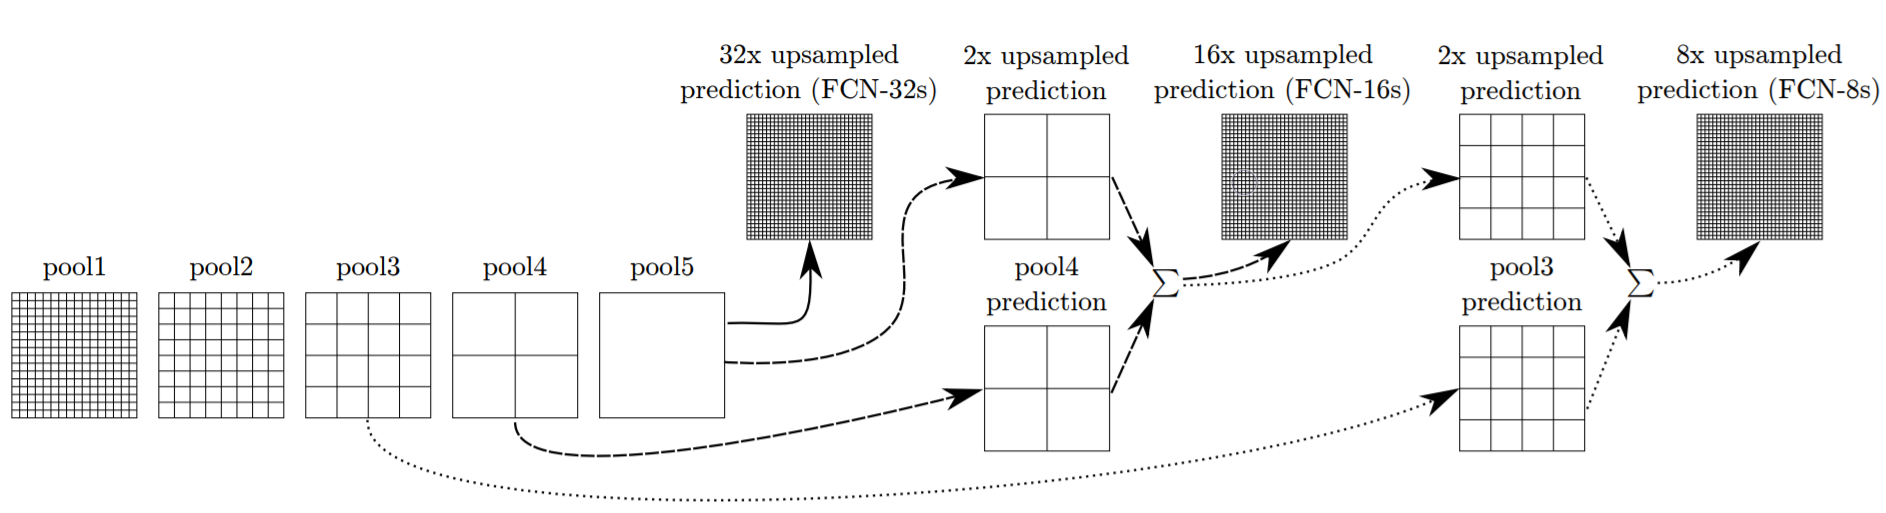

In [16]:
from IPython import display
display.Image('https://mohitjainweb.files.wordpress.com/2018/09/fcn-skip-connections1.png')

In [22]:
# import packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
# using the pre-trained vgg16 algorithm
from tensorflow.keras.applications.vgg16 import *

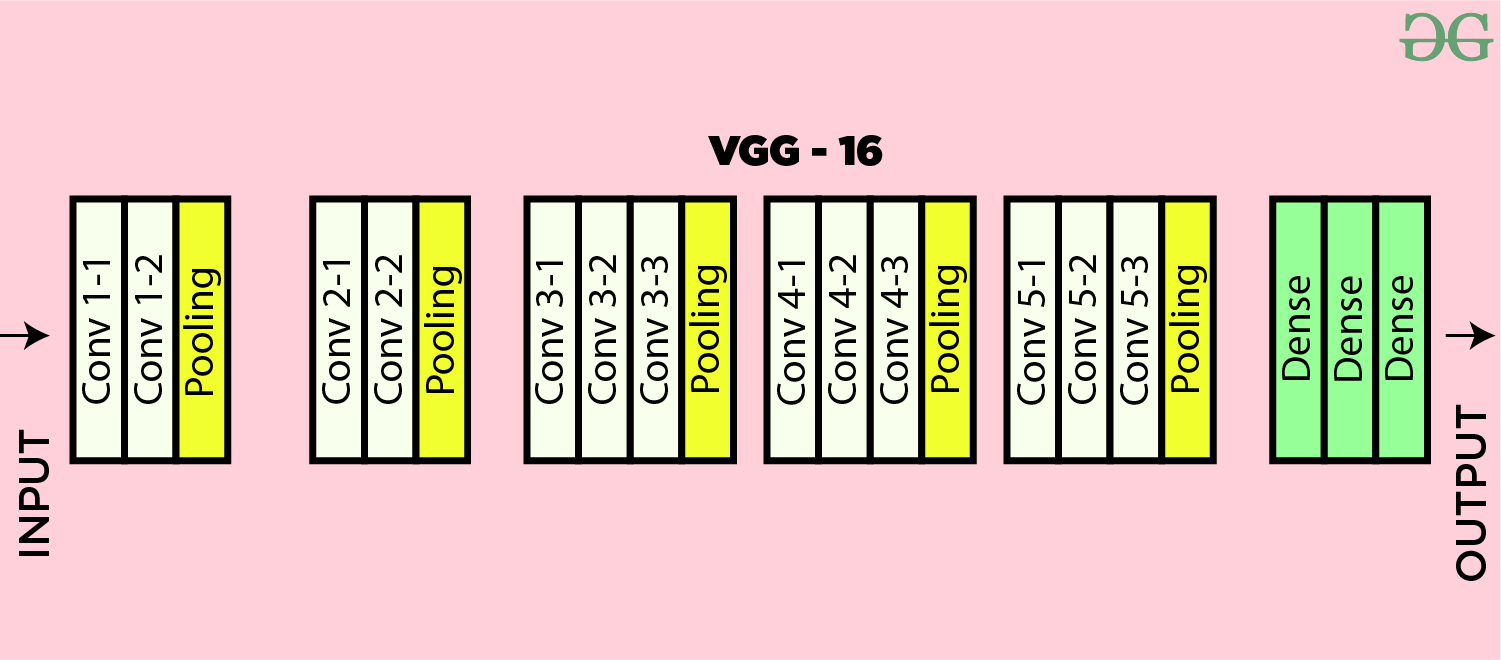

In [18]:
# vgg16 architecture
display.Image('https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg')
# documentation: https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

The vgg16 architecture will be leverage to create the first five pooling layer, the later merging stage will have to be created to replace the 3 dense layers in the vgg-16 architecture. On the other hand, pool3, pool4, and pool5 will have to be extracted for merging purposes

In [19]:
# define function of fcn model

def fcn(image_size = 128, ch_in=3, ch_out=3):
    
    #initiating an keras tensor
#     inputs = Input(shape=(*image_size, ch_in), name='input')
    inputs = Input((image_size, image_size, ch_in))
    # calling the pre-trained vgg-16 model
    vgg16 = VGG16(
        include_top=False, # not including the 3 dense layers
        weights='imagenet', # applying weights from pre-trained imagenet networks
        input_tensor=inputs, # keras tensor as model input
        input_shape= (128,128,3))

    # extracting the outputs of pool3, pool4, pool5
    f3 = vgg16.get_layer('block3_pool').output  
    f4 = vgg16.get_layer('block4_pool').output  
    f5 = vgg16.get_layer('block5_pool').output  
    
    # creating the rest of the convlution and pooling layers
    f6 = Conv2D(filters=4086, kernel_size=7, padding='same',
                      activation='relu')(f5)
    f6_drop = Dropout(0.5)(f6) # add dropout layer to reduce overfitting, parameters can be fine-tuned
    f7 = Conv2D(filters=4086, kernel_size=1, padding='same',
                      activation='relu')(f6_drop)
    f7_drop = Dropout(0.5)(f7)
    f8 = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f7_drop)

    # merging the layers
    
    # transposing pool5 to be merged with prediction from pool4
    f5_transpose = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2,
                                use_bias=False, padding='same', activation='relu')(f5)
    # convolution of pool4
    f4_conv = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f4)
    # Merging the 2 feature maps:
    merge_1 = add([f4_conv, f5_transpose])

    # transposing output from merge_1 to be merged with prediction from pool3
    merge_1_transpose = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2,
                                use_bias=False, padding='same', activation='relu')(merge_1)
    # convolution of pool3
    f3_conv = Conv2D(filters=ch_out, kernel_size=1, padding='same',
                      activation=None)(f3)
    # Merging the 2 feature maps:
    merge2 = add([f3_conv, merge_1_transpose])

    # Transpose to decode and up-scale feature map (28x28) to the original shape (224x224)
    # stride = 224 / 28 = 8
    outputs = Conv2DTranspose(filters=ch_out, kernel_size=16, strides=8,
                              padding='same', activation=None)(merge2)
    
    fcn_model = Model(inputs, outputs)
    return fcn_model

In [30]:
# compile the model
model = fcn(128)

rsmprop = RMSprop(clipvalue=0.5)

model.compile(optimizer=rsmprop,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# model.compile(optimizer=rsmprop,
#               loss='mse',
#               metrics=[tf.keras.metrics.BinaryCrossentropy()])

# model.compile(optimizer=rsmprop,
#               loss='mse',
#               metrics=[tf.keras.metrics.CategoricalCrossentropy()])

In [31]:
# fit model
results = model.fit(x = train_data_clean, y = train_mask_clean, 
                    batch_size=100, 
                    epochs=5)

Epoch 1/5
33/33 [==============================] - 864s 26s/step - loss: 13.8248 - accuracy: 0.3227
Epoch 2/5
33/33 [==============================] - 1392s 43s/step - loss: 6.3719 - accuracy: 0.3522
Epoch 3/5
33/33 [==============================] - 1086s 33s/step - loss: 6.4123 - accuracy: 0.3331
Epoch 4/5
33/33 [==============================] - 848s 26s/step - loss: 6.3232 - accuracy: 0.3311
Epoch 5/5
33/33 [==============================] - 845s 26s/step - loss: 6.4259 - accuracy: 0.3238


In [105]:
predicted_val = model.predict(val_data_clean)

In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing import *
import matplotlib.pyplot as plt

In [55]:
# function for showing sample images and its mask from the dataset
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()


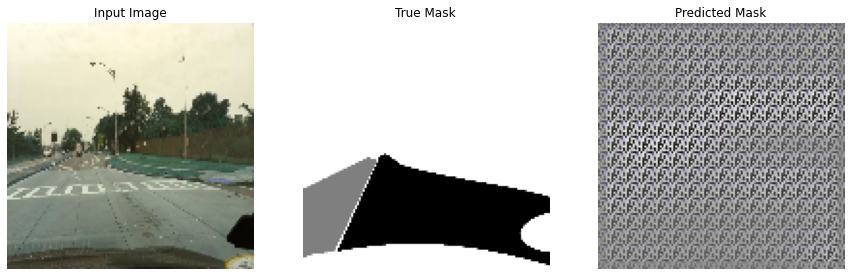

In [272]:
#show sample of train, true mask, and predicted mask images
display([val_data_clean[50], val_mask_clean[50],predicted_val[50]])

## Converting data in greyscale to classify into drivable, alternative drivable and background

In [205]:
# define function to save predicted images
def save_image(array, filepath):
    j = 0
    for i in array:
        fn = 'file' + str(j)
        cv2.imwrite(filepath + fn + '.jpeg', i)
        j+=1

In [206]:
# define function to transform predicted images to greyscale by reloading images
def transform_grayscale(array, filepath):
    
    save_image(array, filepath)
    
    j = 0
    grayscale = np.empty(shape = (len(array), 128, 128), dtype = 'float32')
    for i in range(len(array)):
        fn = filepath + 'file' + str(j)
        im_gray = cv2.imread(fn+'.jpeg', cv2.IMREAD_GRAYSCALE)
        grayscale[j] = im_gray
        j=+1
    return grayscale

In [208]:
# get grayscale version of predicted images
filepath = '/Users/karina/Documents/MIDS/w207/Project/Final Project/predicted_val/'
grayscale_pred = transform_grayscale(predicted_val, filepath)

In [249]:
# define function to read image by greyscale
def read_grayscale(array, filepath, filename):
    j = 0
    grayscale = np.empty(shape = (len(array), 720, 1280), dtype = 'float32')
    for i in range(len(array)):
        fn = filepath + filename[j][:-4] +'.png'
        im_gray = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        grayscale[j] = im_gray
        j=+1
        
    
    grayscale_resize = np.empty(shape = (len(array), 128, 128), dtype = 'float32')

    for i in range(len(array)):
        image = cv2.resize(grayscale[i], (128,128))
    
        grayscale_resize[i] = image 
                                
    return grayscale_resize

In [250]:
filepath = "/Users/karina/Downloads/207_final_project/val/val_mask/"
# @ Fidelia, use the val split [name] here for filename on your end
grayscale_mask = read_grayscale(val_data_list, filepath, filename = val_data_list)

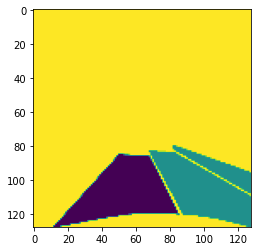

In [290]:
# check grayscale mask
plt.imshow(grayscale_mask[0])

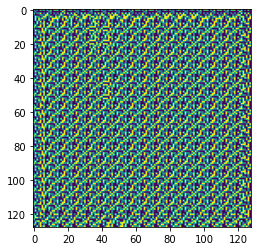

In [288]:
# check grayscale predicted image
plt.imshow(grayscale_pred[0])

In [322]:
# define function to classify pixel into drivable, non drivable and background
def classify(array, bins):
    classiflied = array.copy()
    for i in range(len(array)):
        classified_image = np.digitize(array[i],bins)
        classiflied[i] = classified_image
    return classiflied

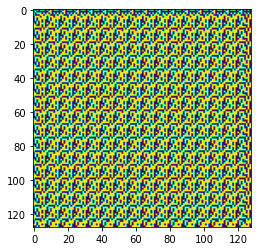

In [358]:
classified_pred = classify(grayscale_pred,[255/3*2])
classified_pred[0][-1]
plt.imshow(classified_pred[0])

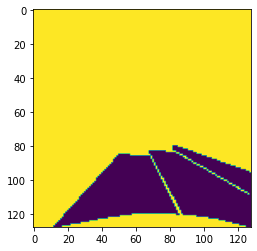

In [355]:
#classify into two bins (drivable and background)
bins = [2]
classified_mask = classify(grayscale_mask,bins)
classified_mask[0][-1]
plt.imshow(classified_mask[0])

In [360]:
acc = metrics.accuracy_score(classified_mask[0].flatten(),classified_pred[0].flatten())
print(acc)
recall = metrics.recall_score(classified_mask[0].flatten(),classified_pred[0].flatten())
print(recall)
precision = metrics.precision_score(classified_mask[0].flatten(),classified_pred[0].flatten())
print(precision)

metrics.confusion_matrix(classified_mask[0].flatten(), classified_pred[0].flatten())

0.54833984375
0.5853076923076923
0.7911208151382824


array([[1375, 2009],
       [5391, 7609]])

## Evaluation metrics

In [376]:
from statistics import mean

def evaluation(y_true, y_pred):
    
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    summary = {}
    
    for i in range(len(y_true)):
        
        acc = metrics.accuracy_score(y_true[i].flatten(), y_pred[i].flatten())
        recall = metrics.recall_score(y_true[i].flatten(), y_pred[i].flatten())
        precision = metrics.precision_score(y_true[i].flatten(), y_pred[i].flatten())
        f1_score = metrics.f1_score(y_true[i].flatten(), y_pred[i].flatten())

        accuracies.append(acc)
        recalls.append(recall)
        precisions.append(precision)
        f1_scores.append(f1_score)
        
    summary['accuracy'] = mean(accuracies)
    summary['recall'] = mean(recalls)
    summary['precision'] = mean(precisions)
    summary['f1_score'] = mean(f1_scores)
        
    return accuracies, precisions, recalls, f1_scores, summary

In [377]:
accuracies, precisions, recalls, f1_scores, summary = evaluation(classified_mask, classified_pred)

In [378]:
summary

{'accuracy': 0.997478239342612,
 'recall': 0.0032827473084767124,
 'precision': 0.004454650108130473,
 'f1_score': 0.003779936415837517}